# Rafa Analysis

Primary columns:
Country/country rank
Channel type/channel_rank
Category
Created year
Views/video_views_rank
Video view for the last 30 days
Subscribers

In [16]:
options(scipen = 999)
# uploading data

data <- read.csv("../youtube_data/Global_YouTube_Statistics.csv")

# Give the code in R-package, for uploading a data set and give the code with the summary statistics, and four visualizations finding relationships, outliers, or interesting trends in the data set.

# write the code

# summary statistics

summary(data)


      rank         Youtuber          subscribers         video.views          
 Min.   :  1.0   Length:995         Min.   : 12300000   Min.   :           0  
 1st Qu.:249.5   Class :character   1st Qu.: 14500000   1st Qu.:  4288145410  
 Median :498.0   Mode  :character   Median : 17700000   Median :  7760819588  
 Mean   :498.0                      Mean   : 22982412   Mean   : 11039537052  
 3rd Qu.:746.5                      3rd Qu.: 24600000   3rd Qu.: 13554701853  
 Max.   :995.0                      Max.   :245000000   Max.   :228000000000  
                                                                              
   category            Title              uploads           Country         
 Length:995         Length:995         Min.   :     0.0   Length:995        
 Class :character   Class :character   1st Qu.:   194.5   Class :character  
 Mode  :character   Mode  :character   Median :   729.0   Mode  :character  
                                       Mean   :  9187.1     

In [21]:
famous_youtubers <- head(data[order(-data$highest_yearly_earnings), ], 10)


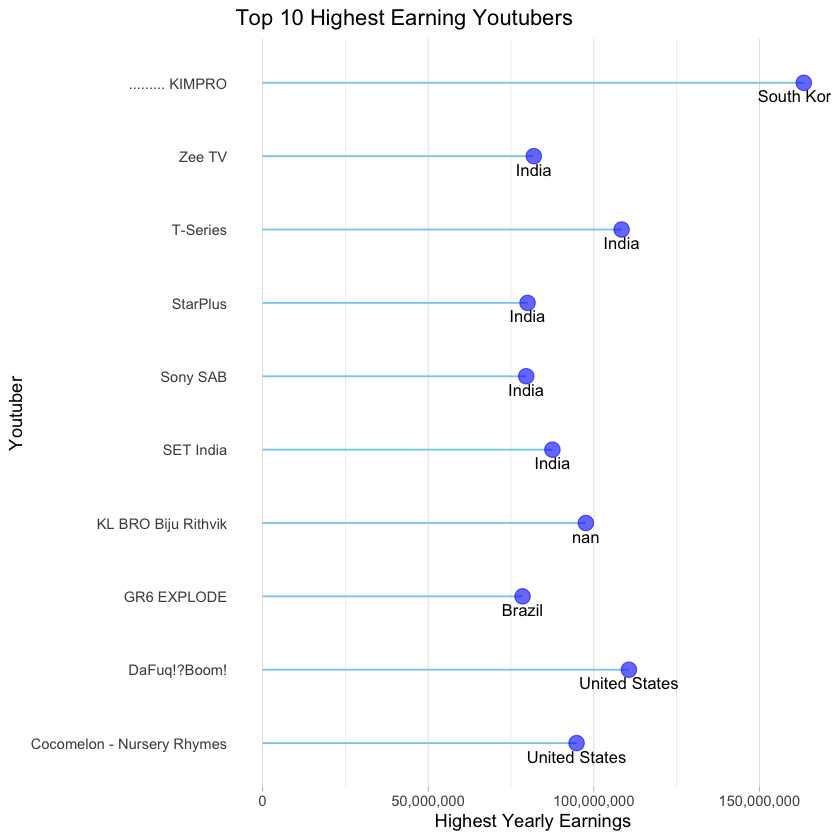

In [22]:
library(ggplot2)
library(scales)

ggplot(famous_youtubers, aes(x = Youtuber, y = highest_yearly_earnings)) +
  geom_segment(aes(x = Youtuber, xend = Youtuber, y = 0, yend = highest_yearly_earnings), color = "skyblue") +
  geom_point(color = "blue", size = 4, alpha = 0.6) +
  geom_text(aes(label = Country), vjust = 1.6, color = "black", size = 3.5) +
  theme_light() +
  coord_flip() +
  theme(
    panel.grid.major.y = element_blank(),
    panel.border = element_blank(),
    axis.ticks.y = element_blank()
  ) +
  scale_y_continuous(labels = comma) +
  labs(title = "Top 10 Highest Earning Youtubers", x = "Youtuber", y = "Highest Yearly Earnings")


1. Which category generates more money in each country?

2. Olders channels earn more?

3. Which country has more income per suscriber?

4. Which youtuber has more views per suscriber?

5. Did older channels have more views the last three days?

6. Where are the oldest channels?



In [2]:
install.packages("dplyr")



The downloaded binary packages are in
	/var/folders/qq/17cwmxhd3jv_w07w8pf57y5r0000gn/T//RtmpuDXR8f/downloaded_packages


In [19]:
# group by Country and category and find the sum of max yearly earnings and order them from max to min

library(dplyr)

top_10_categories_by_country <- data %>%
  group_by(Country, category) %>%
  summarise(max_yearly_earnings = sum(highest_yearly_earnings)) %>%
  arrange(desc(max_yearly_earnings)) %>%
  head(10)

top_10_categories_by_country


`summarise()` has grouped output by 'Country'. You can override using the
`.groups` argument.


Country,category,max_yearly_earnings
<chr>,<chr>,<dbl>
India,Entertainment,534201200
United States,Entertainment,424177815
United States,Music,389186410
India,Music,366631800
United States,People & Blogs,323867700
India,Shows,247900000
United States,Comedy,219608700
United States,Education,194444500
India,People & Blogs,177501600


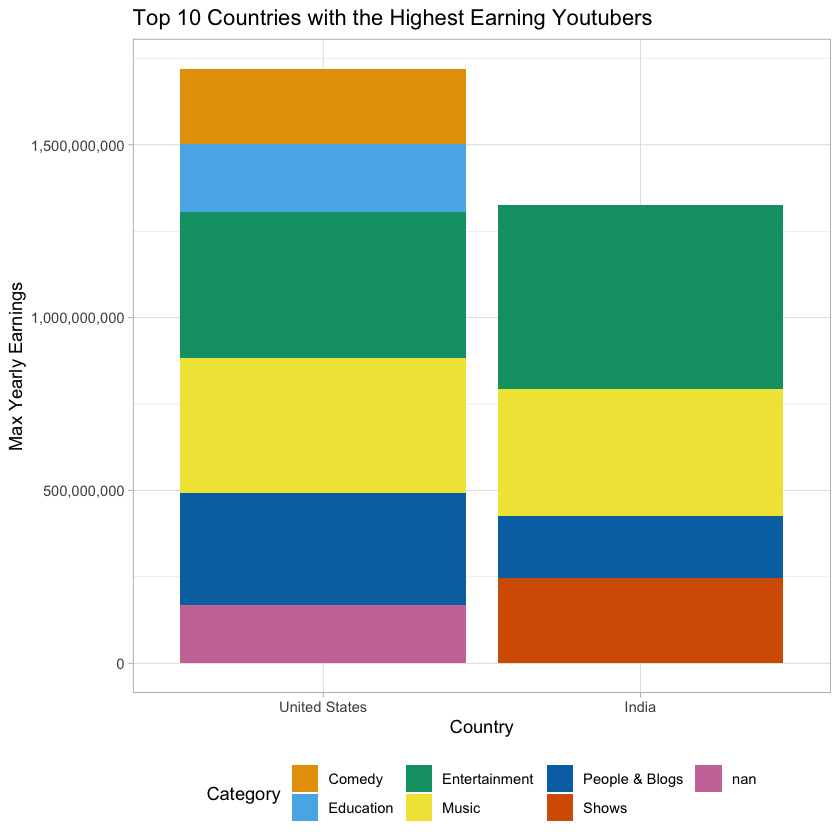

In [27]:
my_palette <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
top_10_categories_by_country %>% ggplot(aes(x = reorder(Country, max_yearly_earnings), y = max_yearly_earnings, fill = category)) +
  geom_bar(stat = "identity") +
  theme_light() +
  theme(legend.position = "bottom") +
  labs(title = "Top 10 Countries with the Highest Earning Youtubers", x = "Country", y = "Max Yearly Earnings", fill = "Category") +
  scale_fill_manual(values = my_palette) +
  scale_y_continuous(labels = comma)


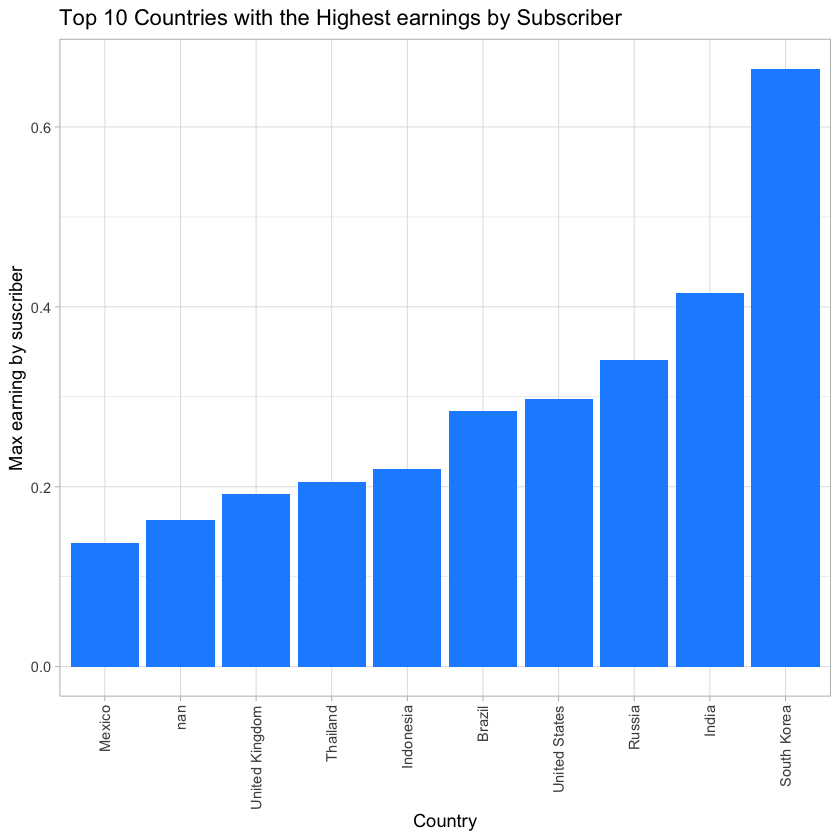

In [32]:
# Group by Country, and sum max yearly earnings and suscribers, order them from max to lower and make a plot

top_10_countries_by_subscribers <- data %>%
  group_by(Country) %>%
  summarise(max_yearly_earnings = sum(highest_yearly_earnings), max_subscribers = sum(subscribers)) %>%
  arrange(desc(max_subscribers)) %>%
  head(10)

top_10_countries_by_subscribers$earningsbysuscriber <- top_10_countries_by_subscribers$max_yearly_earnings / top_10_countries_by_subscribers$max_subscribers

top_10_countries_by_subscribers %>% ggplot(aes(x = reorder(Country, earningsbysuscriber), y = earningsbysuscriber)) +
  geom_bar(stat = "identity", fill = "dodgerblue") +
  theme_light() +
  theme(legend.position = "bottom") +
  labs(title = "Top 10 Countries with the Highest earnings by Subscriber", x = "Country", y = "Max earning by suscriber") +
  scale_y_continuous(labels = comma) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))


In [35]:
# group by Youtuber and Country, sum video.views and suscribers, computing a new variable, video.views by suscriber, order them from max to lower and make lolliplot, add text as country

top_10_youtubers_by_subscribers <- data %>%
  group_by(Youtuber, Country) %>%
  summarise(yearly_earnings = sum(highest_yearly_earnings), subscribers = sum(subscribers), video_views = sum(video.views)) %>%
  arrange(desc(subscribers)) %>%
  head(10)

top_10_youtubers_by_subscribers$viewsbysuscriber <- top_10_youtubers_by_subscribers$video_views / top_10_youtubers_by_subscribers$subscribers


`summarise()` has grouped output by 'Youtuber'. You can override using the
`.groups` argument.


In [37]:
head(top_10_youtubers_by_subscribers)


Youtuber,Country,yearly_earnings,subscribers,video_views,viewsbysuscriber
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
T-Series,India,108400000.00,245000000,228000000000,930.6122
YouTube Movies,United States,0.58,170000000,0,0.0000
MrBeast,United States,64700000.00,166000000,28368841870,170.8966
Cocomelon - Nursery Rhymes,United States,94800000.00,162000000,164000000000,1012.3457
SET India,India,87500000.00,159000000,148000000000,930.8176
Music,nan,0.00,119000000,0,0.0000


In [49]:
# order top_10_youtubers_by_subscribers by viewsbysuscriber in descending order

top_10_youtubers_by_subscribers <- top_10_youtubers_by_subscribers[order(-top_10_youtubers_by_subscribers$viewsbysuscriber), ]

head(top_10_youtubers_by_subscribers)


Youtuber,Country,yearly_earnings,subscribers,video_views,viewsbysuscriber
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
Cocomelon - Nursery Rhymes,United States,94800000,162000000,164000000000,1012.3457
SET India,India,87500000,159000000,148000000000,930.8176
T-Series,India,108400000,245000000,228000000000,930.6122
Like Nastya,Russia,2300000,106000000,90479060027,853.5760
Kids Diana Show,United States,35100000,112000000,93247040539,832.5629
Vlad and Niki,United States,27900000,98900000,77180169894,780.3859


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


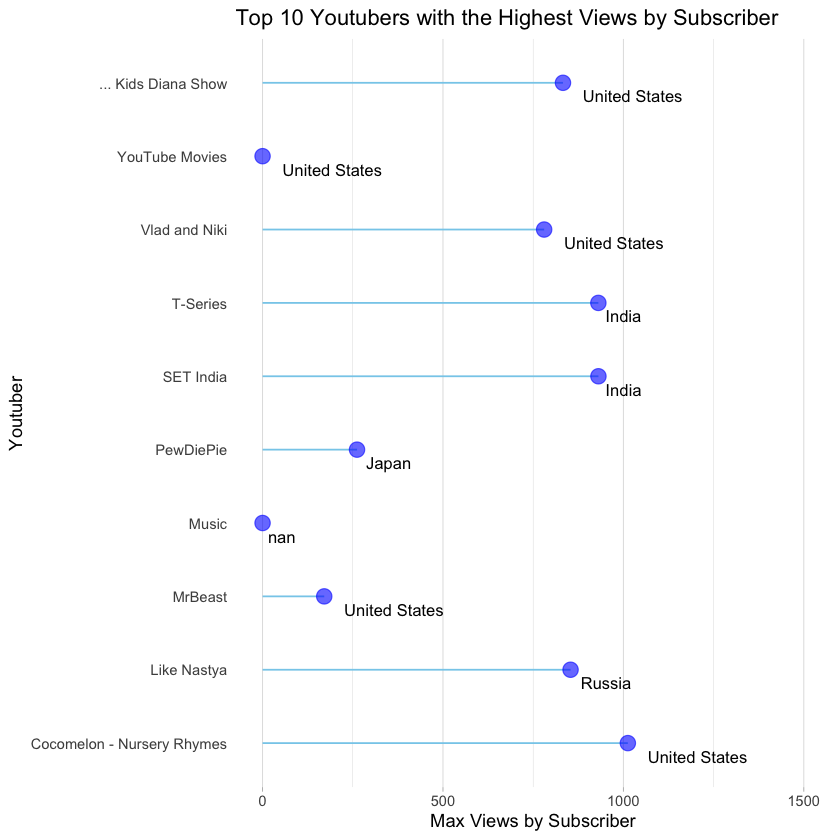

In [55]:
top_10_youtubers_by_subscribers %>% ggplot(aes(x = reorder(Youtuber, -viewsbysuscriber), y = viewsbysuscriber)) +
  geom_segment(aes(x = Youtuber, xend = Youtuber, y = 0, yend = viewsbysuscriber), color = "skyblue") +
  geom_point(color = "blue", size = 4, alpha = 0.6) +
  geom_text(aes(label = Country), vjust = 1.6, hjust = -.2, color = "black", size = 3.5) +
  theme_light() +
  coord_flip() +
  theme(
    panel.grid.major.y = element_blank(),
    panel.border = element_blank(),
    axis.ticks.y = element_blank()
  ) +
  scale_y_continuous(labels = comma) +
  labs(title = "Top 10 Youtubers with the Highest Views by Subscriber", x = "Youtuber", y = "Max Views by Subscriber") +
  ylim(0, 1500)


In [20]:
unique(data$category)

length(unique(data$category))


[1] "Music"                 "Film & Animation"      "Entertainment"        
 [4] "Education"             "Shows"                 "nan"                  
 [7] "People & Blogs"        "Gaming"                "Sports"               
[10] "Howto & Style"         "News & Politics"       "Comedy"               
[13] "Trailers"              "Nonprofits & Activism" "Science & Technology" 
[16] "Movies"                "Pets & Animals"        "Autos & Vehicles"     
[19] "Travel & Events"

[1] 19

In [24]:
unique(data$channel_type)

length(unique(data$channel_type))


[1] "Music"         "Games"         "Entertainment" "Education"    
 [5] "People"        "Sports"        "Film"          "News"         
 [9] "nan"           "Comedy"        "Howto"         "Nonprofit"    
[13] "Autos"         "Tech"          "Animals"

[1] 15

In [30]:
table(data$category, data$channel_type)


                       
                        Animals Autos Comedy Education Entertainment Film Games
  Autos & Vehicles            0     1      0         0             1    0     0
  Comedy                      0     0     38         0            20    1     3
  Education                   0     0      0        35             3    2     2
  Entertainment               0     1      5         2           169    7    11
  Film & Animation            0     0      1         2            16   17     3
  Gaming                      0     1      1         0            18    2    63
  Howto & Style               0     0      0         0             7    0     0
  Movies                      0     0      0         0             0    2     0
  Music                       0     0      0         1            12    5     2
  News & Politics             0     0      0         0             3    0     0
  Nonprofits & Activism       0     0      0         0             0    0     0
  People & Blogs

In [11]:
options(scipen = 999)

# Create the contingency table
table <- xtabs(video.views ~ category + channel_type, data)


# Format the table with comma-separated thousands
table_formatted <- format(table, big.mark = ",")

# Create a formatted table in markdown format
knitr::kable(table_formatted, format = "markdown")




|                      |Animals        |Autos         |Comedy          |Education       |Entertainment     |Film            |Games           |Howto           |Music             |News            |Nonprofit      |People          |Sports          |Tech           |nan            |
|:---------------------|:--------------|:-------------|:---------------|:---------------|:-----------------|:---------------|:---------------|:---------------|:-----------------|:---------------|:--------------|:---------------|:---------------|:--------------|:--------------|
|Autos & Vehicles      |0              |5,405,563,355 |0               |0               |9,597,894,786     |0               |0               |0               |0                 |0               |0              |0               |0               |0              |0              |
|Comedy                |0              |0             |323,306,249,455 |0               |111,013,015,233   |5,525,773,746   |52,966,747,439  |0               |0    

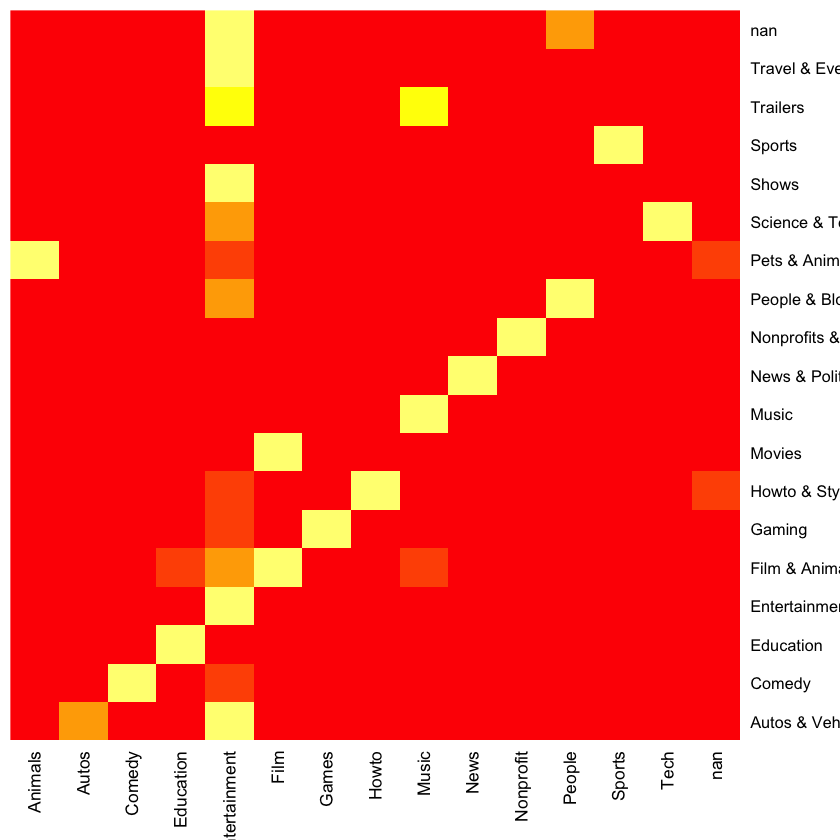

In [36]:
heatmap(table, Rowv = NA, Colv = NA, col = heat.colors(5), margins = c(5, 5))



The downloaded binary packages are in
	/var/folders/qq/17cwmxhd3jv_w07w8pf57y5r0000gn/T//RtmpNT6pYM/downloaded_packages


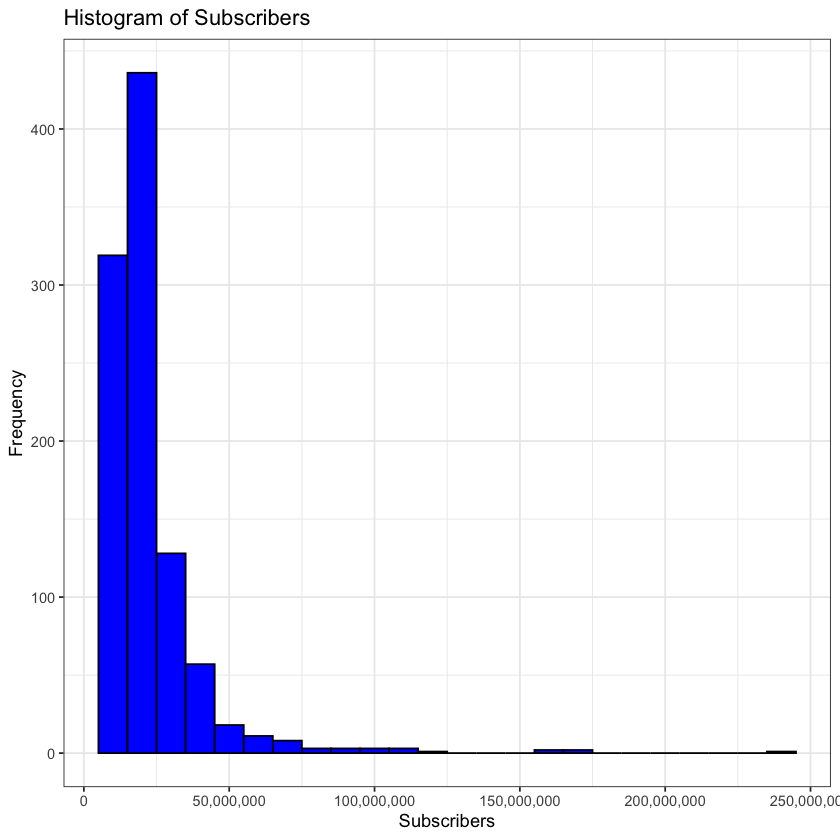

In [11]:
# Plot a histogram of suscribers

library(ggplot2)
# Load the ggplot2 and scales packages
library(scales)

# Create the histogram with comma separator for thousands in x-axis label
ggplot(data, aes(x = subscribers)) +
  geom_histogram(binwidth = 10000000, fill = "blue", color = "black") +
  labs(title = "Histogram of Subscribers", x = "Subscribers", y = "Frequency") +
  scale_x_continuous(labels = comma) +
  theme_bw()


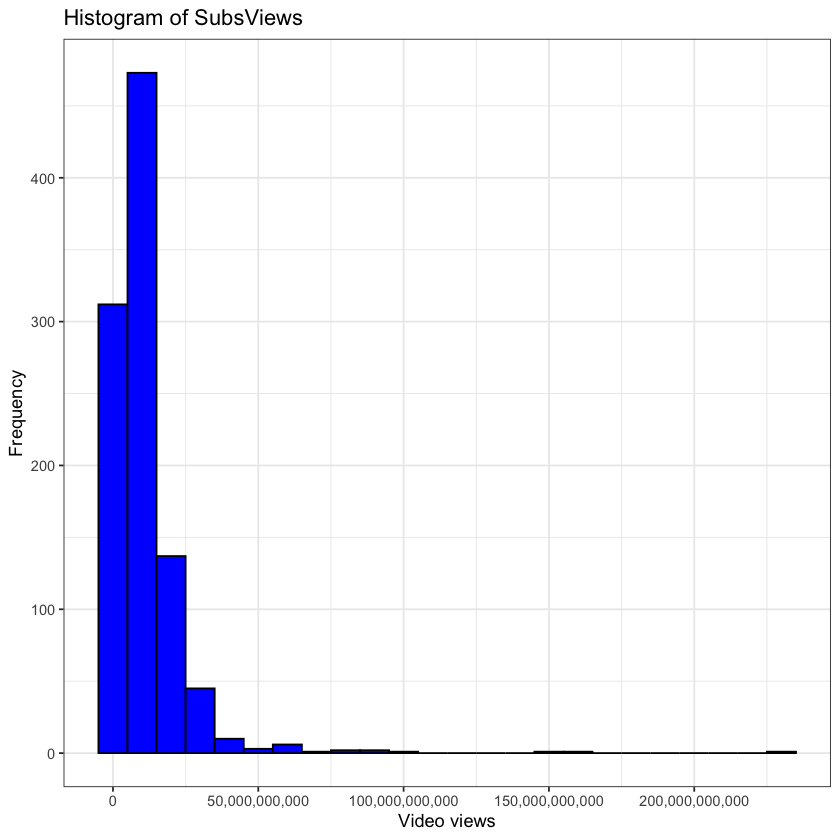

In [12]:
# Create the histogram with comma separator for thousands in x-axis label
ggplot(data, aes(x = video.views)) +
  geom_histogram(binwidth = 10000000000, fill = "blue", color = "black") +
  labs(title = "Histogram of SubsViews", x = "Video views", y = "Frequency") +
  scale_x_continuous(labels = comma) +
  theme_bw()


Warning message:
"Groups with fewer than two data points have been dropped."


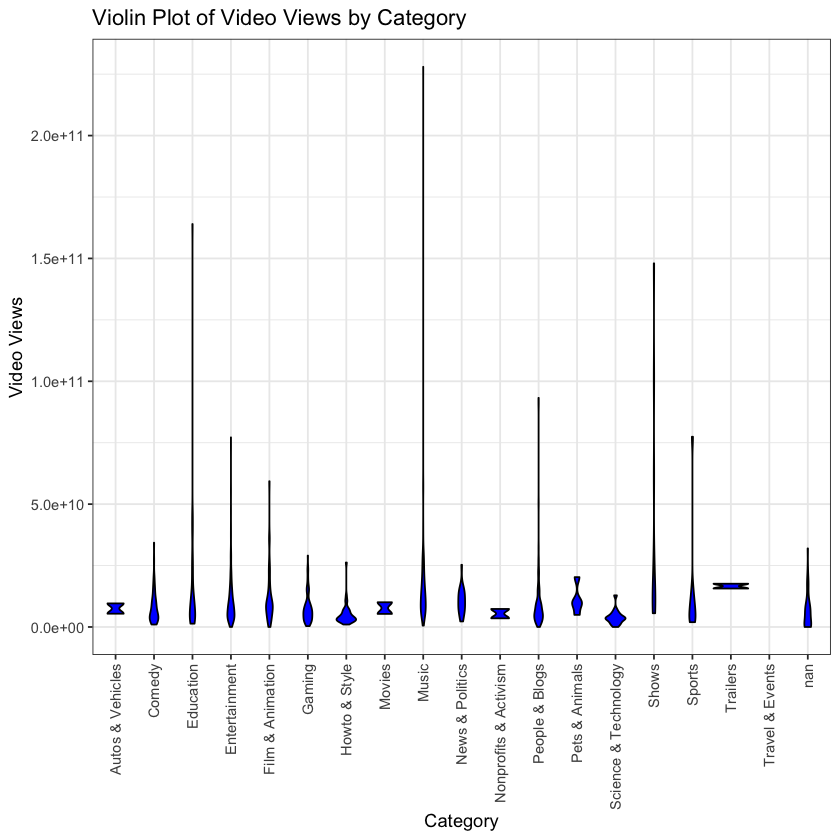

In [17]:
# create a violin plot by category in x axis and video views in y axis, put the names vertically in the x-axis

# Create the violin plot

ggplot(data, aes(x = category, y = video.views)) +
  geom_violin(fill = "blue", color = "black") +
  labs(title = "Violin Plot of Video Views by Category", x = "Category", y = "Video Views") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))


Warning message:
"Groups with fewer than two data points have been dropped."


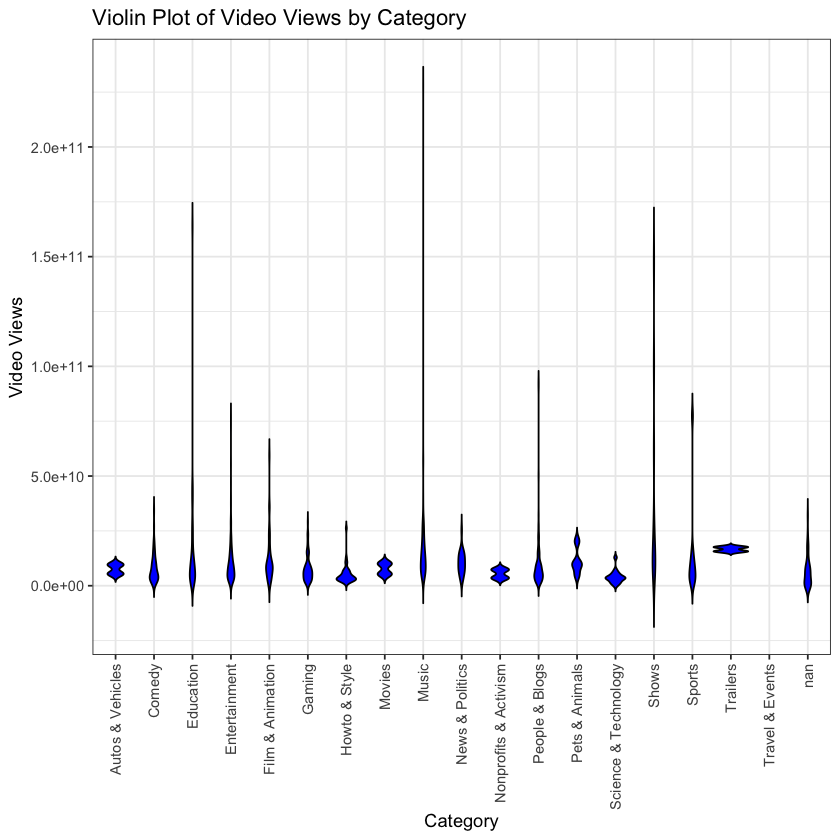

In [18]:
# create a violin plot by category in x axis and video views in y axis, put the names vertically in the x-axis

# Create the violin plot

ggplot(data, aes(x = category, y = )) +
  geom_violin(fill = "blue", color = "black") +
  labs(title = "Violin Plot of Video Views by Category", x = "Category", y = "Video Views") +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))
